In [1]:
import pandas as pd

In [2]:
Patients=pd.read_csv('patients.csv')

In [3]:
Patients.head(5)

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


In [4]:
Patients.dtypes

patient_id            object
first_name            object
last_name             object
gender                object
date_of_birth         object
contact_number         int64
address               object
registration_date     object
insurance_provider    object
insurance_number      object
email                 object
dtype: object

In [5]:
Patients['date_of_birth']=pd.DatetimeIndex(Patients['date_of_birth'])

In [6]:
Patients['registration_date']=pd.DatetimeIndex(Patients['registration_date'])

In [7]:
Patients.isnull().sum()

patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64

In [8]:
Treatments=pd.read_csv('treatments.csv')

In [9]:
Treatments.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


In [10]:
Treatments.dtypes

treatment_id       object
appointment_id     object
treatment_type     object
description        object
cost              float64
treatment_date     object
dtype: object

In [11]:
Treatments['treatment_date']=pd.DatetimeIndex(Treatments['treatment_date'])

In [12]:
Doctors=pd.read_csv('doctors.csv')

In [13]:
Doctors.head()

,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com


In [14]:
Doctors.dtypes

doctor_id           object
first_name          object
last_name           object
specialization      object
phone_number         int64
years_experience     int64
hospital_branch     object
email               object
dtype: object

In [15]:
Appointments=pd.read_csv('appointments.csv')

In [16]:
Appointments.head()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


In [17]:
Appointments.dtypes

appointment_id      object
patient_id          object
doctor_id           object
appointment_date    object
appointment_time    object
reason_for_visit    object
status              object
dtype: object

In [18]:
Appointments['appointment_date']=pd.DatetimeIndex(Appointments['appointment_date'])

In [19]:
Appointments.isnull().sum()

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64

In [20]:
Billing=pd.read_csv('billing.csv')

In [21]:
Billing.dtypes

bill_id            object
patient_id         object
treatment_id       object
bill_date          object
amount            float64
payment_method     object
payment_status     object
dtype: object

In [22]:
Billing.head()

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


1. Merge patients & visits → patients with > 5 visits

In [23]:
visit_count = (
    Appointments.groupby("patient_id").size().reset_index(name="visit_count"))

In [24]:
frequent_patients = visit_count[visit_count["visit_count"] > 5]

In [25]:
final_result = pd.merge(Patients,frequent_patients,on="patient_id",how="inner")
final_result

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email,visit_count
0,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com,8
1,P010,Michael,Taylor,M,2001-10-13,7081396733,123 Elm St,2022-08-24,WellnessCorp,INS866577,michael.taylor@mail.com,6
2,P012,Laura,Davis,F,1991-12-08,8135666049,321 Maple Dr,2023-04-27,MedCare Plus,INS104014,laura.davis@mail.com,10
3,P016,Michael,Taylor,M,2000-07-22,7223380592,789 Pine Rd,2021-07-23,PulseSecure,INS156958,michael.taylor@mail.com,7
4,P023,Linda,Johnson,M,1994-02-22,6141951830,789 Pine Rd,2021-12-27,WellnessCorp,INS730152,linda.johnson@mail.com,6
5,P026,John,Taylor,M,2003-11-28,9900972256,123 Elm St,2021-05-13,MedCare Plus,INS598863,john.taylor@mail.com,6
6,P029,David,Smith,M,2005-05-15,8923607677,789 Pine Rd,2023-04-19,HealthIndia,INS630089,david.smith@mail.com,7
7,P035,David,Wilson,F,1993-04-13,7039619487,123 Elm St,2023-07-09,MedCare Plus,INS897079,david.wilson@mail.com,7
8,P036,Michael,Wilson,M,1997-12-26,8545613046,123 Elm St,2022-10-04,MedCare Plus,INS764076,michael.wilson@mail.com,7
9,P037,Robert,Williams,M,1999-02-05,8886800195,456 Oak Ave,2021-09-30,HealthIndia,INS319963,robert.williams@mail.com,6


<Axes: xlabel='patient_id'>

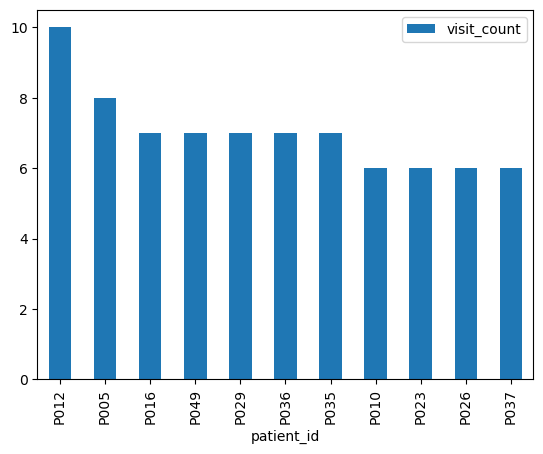

In [26]:
top = frequent_patients.sort_values("visit_count", ascending=False).head(15)
top.plot(kind='bar',x='patient_id')

2.  Total billed amount per patient

In [27]:
total_billed = (Billing.groupby("patient_id")["amount"].sum().reset_index(name="total_billed_amount"))
total_billed = total_billed.merge(Patients, on="patient_id")


<Axes: xlabel='patient_id', ylabel='total_billed_amount'>

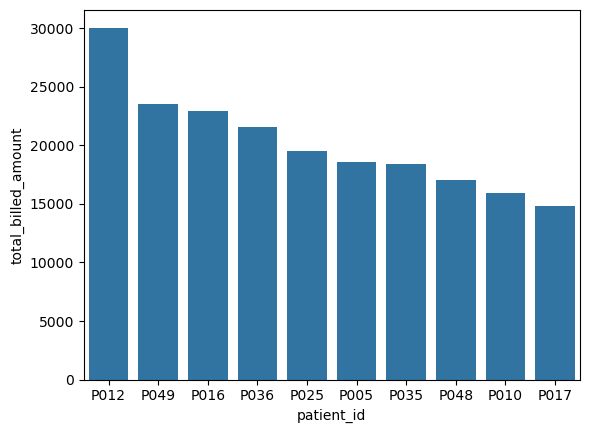

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
z=total_billed.sort_values("total_billed_amount", ascending=False).head(10)
sns.barplot(z, x="patient_id", y="total_billed_amount")


3. Average treatment cost per treatment_type

In [29]:
Treatments.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


In [30]:
Average_treatment=Treatments.groupby('treatment_type')['cost'].mean().reset_index(name='average_cost')
Average_treatment

,treatment_type,average_cost
0,Chemotherapy,2629.707755
1,ECG,2532.216842
2,MRI,3224.948889
3,Physiotherapy,2761.613889
4,X-Ray,2698.870000


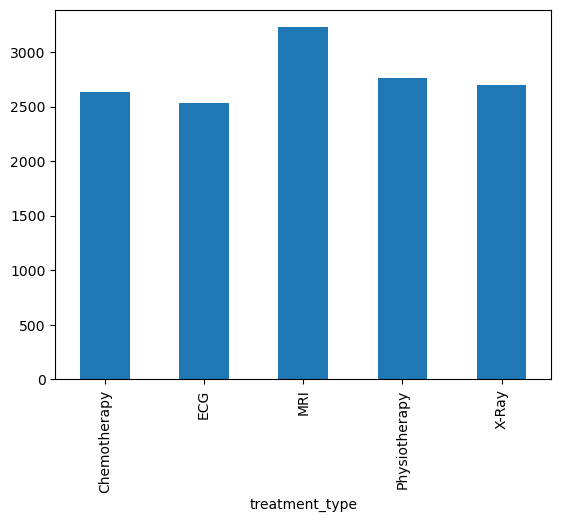

In [31]:
import matplotlib.pyplot as plt
Average_treatment.plot(kind="bar",x="treatment_type",y="average_cost",legend=False)
plt.title="Average Treatment Cost by Treatment Type"
plt.xlabel='Treatment_type'
plt.ylabel='Average_cost'

4.  Median number of visits per patient

In [32]:
Appointments.columns

Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status'],
      dtype='object')

<Axes: ylabel='Count'>

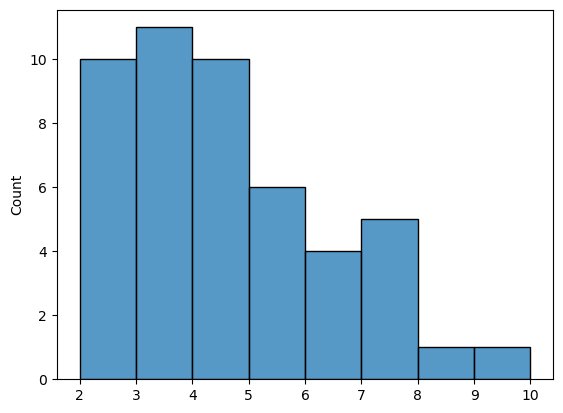

In [33]:
visit_counts=Appointments.groupby('patient_id').size()
median_visits=visit_counts.median()
sns.histplot(visit_counts,kde=False)

6.  Min and max bill amount per insurance_provider

In [34]:
merged_bill = pd.merge(Patients, Billing, on="patient_id")

<Axes: >

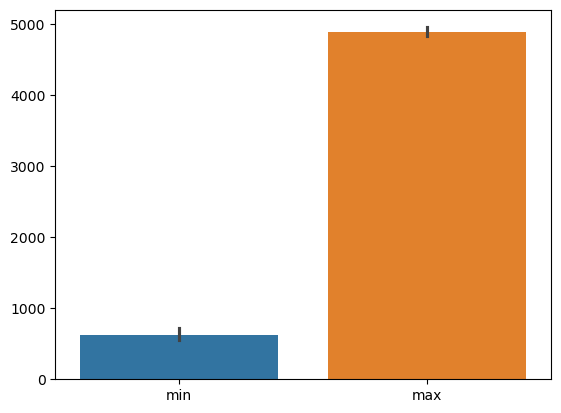

In [35]:
min_max_bill = (merged_bill.groupby("insurance_provider")["amount"].agg(min="min",max="max").reset_index())
sns.barplot(min_max_bill)

7.  Patient with highest total billing

<Axes: xlabel='patient_id'>

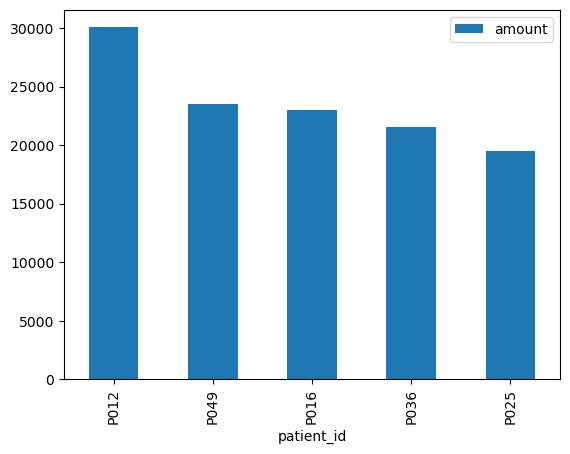

In [36]:
total_billing=(Billing.groupby('patient_id')['amount'].sum().sort_values(ascending=False).reset_index().head(5))
total_billing.plot(kind='bar',x='patient_id')

8. Total treatments per doctor

In [37]:
appt_treat = pd.merge(Appointments,Treatments,on="appointment_id")

,doctor_id,total_treatments
0,D001,25
1,D002,21
2,D003,22
3,D004,14
4,D005,29
5,D006,24
6,D007,13
7,D008,16
8,D009,17
9,D010,19


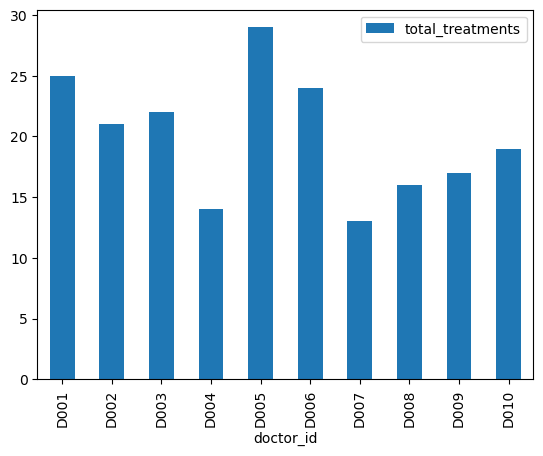

In [38]:
treatments_per_doctor = (appt_treat.groupby("doctor_id").size().reset_index(name="total_treatments"))
treatments_per_doctor.plot(kind='bar',x='doctor_id')
treatments_per_doctor

9.  Doctor who performed most expensive treatment

In [39]:
max_treatment = Treatments.loc[Treatments["cost"].idxmax()]
max_treatment

treatment_id                     T108
appointment_id                   A108
treatment_type                  X-Ray
description         Advanced protocol
cost                          4973.63
treatment_date    2023-04-21 00:00:00
Name: 107, dtype: object

In [40]:
merged = (Treatments.merge(Appointments[["appointment_id","doctor_id"]], on="appointment_id", how="left"))

<Axes: xlabel='doctor_id', ylabel='cost'>

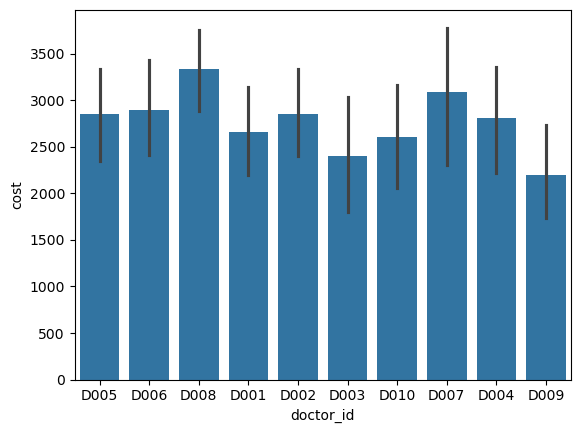

In [41]:
import plotly.express as px
top5_exp = merged.sort_values("cost", ascending=False)
sns.barplot(data=top5_exp,x='doctor_id',y='cost')

10.  Patients visiting more than one doctor


In [42]:
patient_doctor_count = (Appointments.groupby("patient_id")["doctor_id"].nunique().reset_index(name="doctor_count"))

<Axes: xlabel='patient_id', ylabel='doctor_count'>

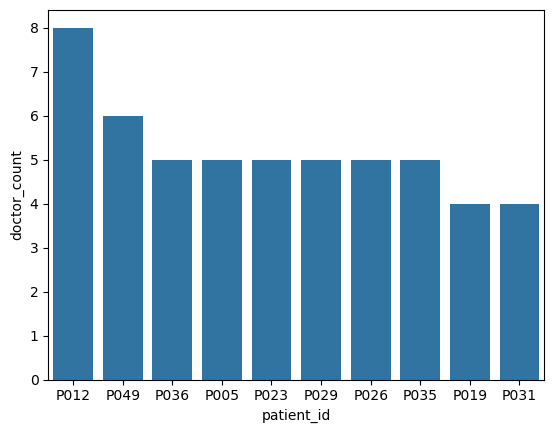

In [43]:
patient_doctor_count.merge(Patients, on="patient_id", how="left")
patient_doctor_count.sort_values("doctor_count", ascending=False).head(10)
top=patient_doctor_count.sort_values("doctor_count",ascending=False).head(10)
sns.barplot(top,x='patient_id',y='doctor_count')

ASSIGNMENT - 2

1. Pivot table: visits per patient per status

<Axes: xlabel='patient_id'>

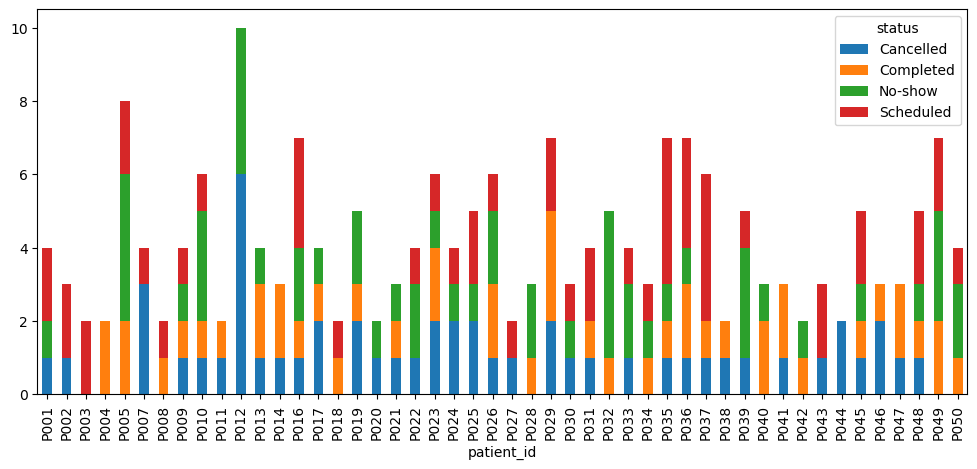

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot_visits = pd.pivot_table(Appointments,index="patient_id",columns="status",values="appointment_id",aggfunc="count",fill_value=0)
pivot_visits.plot(kind='bar',stacked=True,figsize=(12,5))


In [45]:
Appointments.isnull().sum()

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64

2. Crosstab: treatment_type by doctor specialization

In [46]:
merged = (Treatments.merge(Appointments, on="appointment_id").merge(Doctors, on="doctor_id"))

crosstab_spec = pd.crosstab(merged["treatment_type"],merged["specialization"])


In [47]:
crosstab_spec

specialization,Dermatology,Oncology,Pediatrics
treatment_type,,,
Chemotherapy,17,5,27
ECG,13,9,16
MRI,8,8,20
Physiotherapy,15,6,15
X-Ray,17,4,20


<Axes: xlabel='treatment_type'>

<Figure size 1000x600 with 0 Axes>

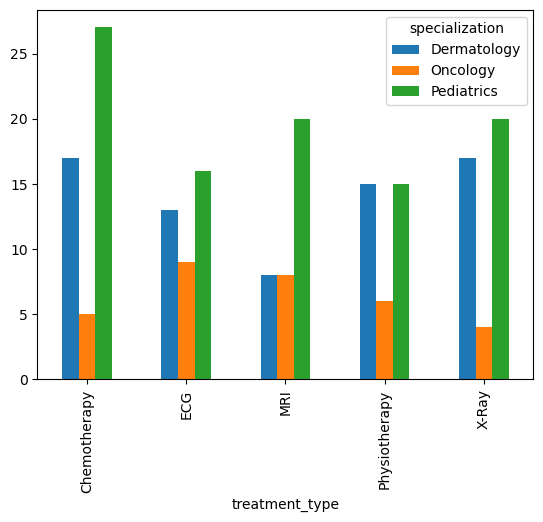

In [48]:
plt.figure(figsize=(10,6))
crosstab_spec.plot(kind='bar')


3.  Pivot: total treatment cost per patient per treatment_type

In [49]:
m = Treatments.merge(Appointments[["appointment_id","patient_id"]], on="appointment_id", how="left")
m

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date,patient_id
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09,P034
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09,P032
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28,P048
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01,P025
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06,P040
...,...,...,...,...,...,...,...
195,T196,A196,Chemotherapy,Advanced protocol,2477.80,2023-10-26,P045
196,T197,A197,Physiotherapy,Standard procedure,975.49,2023-04-01,P001
197,T198,A198,ECG,Basic screening,3383.72,2023-05-15,P022
198,T199,A199,Chemotherapy,Basic screening,1472.17,2023-05-01,P017


In [50]:
pivot_cost = pd.pivot_table(m, index="patient_id", columns="treatment_type",values="cost", aggfunc="sum", fill_value=0)
pivot_cost

treatment_type,Chemotherapy,ECG,MRI,Physiotherapy,X-Ray
patient_id,,,,,
P001,3783.44,2960.14,0.00,975.49,0.00
P002,616.15,0.00,0.00,1736.63,3615.96
P003,0.00,0.00,7936.88,0.00,0.00
P004,0.00,4550.10,0.00,0.00,812.41
P005,2349.63,7257.81,0.00,6845.73,2156.74
P007,3228.14,0.00,0.00,0.00,7506.24
P008,0.00,0.00,0.00,3636.89,0.00
P009,5196.70,1158.68,0.00,0.00,4201.16
P010,5174.29,5134.64,1096.36,0.00,4523.86


<Axes: ylabel='patient_id'>

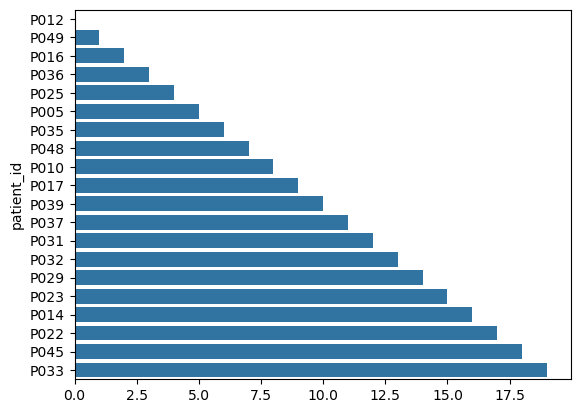

In [51]:
top_ids = pivot_cost.sum(axis=1).sort_values(ascending=False).head(20).index
sns.barplot(data=top_ids)

#4. Crosstab: visits per doctor per status

In [52]:
doc_sta=pd.merge(Doctors,Appointments,on='doctor_id')
doc_sta

,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email,appointment_id,patient_id,appointment_date,appointment_time,reason_for_visit,status
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A019,P029,2023-02-06,15:30:00,Checkup,Cancelled
1,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A022,P005,2023-11-14,13:00:00,Consultation,No-show
2,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A025,P030,2023-02-25,8:00:00,Follow-up,No-show
3,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A041,P005,2023-01-01,14:00:00,Emergency,No-show
4,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,A042,P036,2023-03-21,11:15:00,Emergency,Scheduled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,D010,Linda,Wilson,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,A158,P023,2023-07-12,12:15:00,Checkup,Completed
196,D010,Linda,Wilson,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,A163,P039,2023-06-27,15:00:00,Therapy,No-show
197,D010,Linda,Wilson,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,A166,P005,2023-01-12,14:45:00,Therapy,No-show
198,D010,Linda,Wilson,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,A189,P005,2023-10-05,13:30:00,Follow-up,Scheduled


In [53]:
pd.crosstab(doc_sta['first_name'],doc_sta['status'],doc_sta['reason_for_visit'],aggfunc='count')

status,Cancelled,Completed,No-show,Scheduled
first_name,,,,
Alex,6,5,6,7
David,10,9,12,8
Jane,12,11,8,12
Linda,8,9,9,9
Robert,5,5,2,1
Sarah,10,7,15,14


In [61]:
#5.  Avg, min, max, median, std of treatment costs per doctor specialization (in a single table)
merged = (Treatments.merge(Appointments[["appointment_id","doctor_id"]], on="appointment_id")
          .merge(Doctors[["doctor_id","specialization"]], on="doctor_id", how="left"))
merged

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date,doctor_id,specialization
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09,D009,Pediatrics
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09,D004,Pediatrics
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28,D004,Pediatrics
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01,D006,Pediatrics
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06,D003,Pediatrics
...,...,...,...,...,...,...,...,...
195,T196,A196,Chemotherapy,Advanced protocol,2477.80,2023-10-26,D006,Pediatrics
196,T197,A197,Physiotherapy,Standard procedure,975.49,2023-04-01,D005,Dermatology
197,T198,A198,ECG,Basic screening,3383.72,2023-05-15,D006,Pediatrics
198,T199,A199,Chemotherapy,Basic screening,1472.17,2023-05-01,D001,Dermatology


In [56]:
stats_table = (merged.groupby("specialization")["cost"].agg(avg="mean", min="min", max="max", median="median", std="std").reset_index())

<Axes: xlabel='specialization', ylabel='cost'>

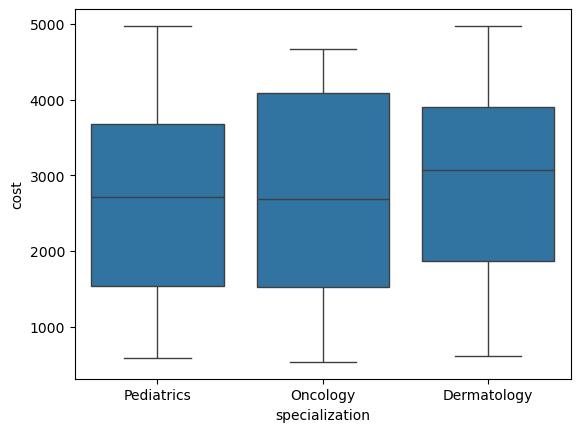

In [57]:
sns.boxplot(data=merged, x="specialization", y="cost")

In [62]:
#6. Most common treatment type per doctor
merged[['doctor_id','treatment_type']].mode

<bound method DataFrame.mode of     doctor_id treatment_type
0        D009   Chemotherapy
1        D004            MRI
2        D004            MRI
3        D006            MRI
4        D003            ECG
..        ...            ...
195      D006   Chemotherapy
196      D005  Physiotherapy
197      D006            ECG
198      D001   Chemotherapy
199      D005          X-Ray

[200 rows x 2 columns]>

In [63]:
#17. Average billing amout per visit per patient
md = Treatments.merge(Appointments[["appointment_id","doctor_id"]], on="appointment_id", how="left")

In [64]:
counts = (md.groupby(["doctor_id","treatment_type"])
          .size().reset_index(name="count"))

In [65]:
most_common = (counts.sort_values(["doctor_id","count"], ascending=[True, False])
               .drop_duplicates("doctor_id"))

In [66]:
a=most_common.sort_values("count", ascending=False).head(15)

<Axes: >

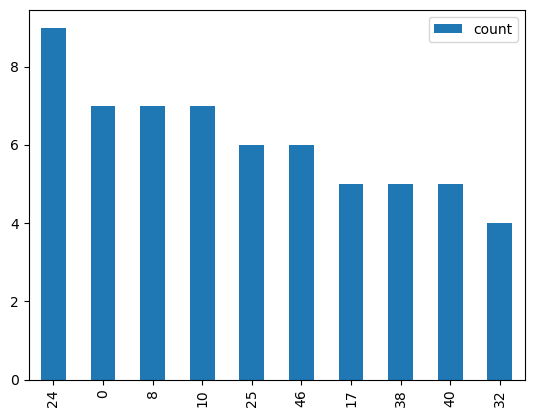

In [67]:
a.plot(kind='bar')

In [69]:
#8. Top 3 spending patients per insurance_provider
sew=pd.merge(Patients,Billing,on='patient_id')
des=sew.groupby(['first_name','insurance_provider'])['amount'].sum().sort_values(ascending=False).head(5)
des

first_name  insurance_provider
David       MedCare Plus          68109.37
Alex        MedCare Plus          43854.68
Michael     MedCare Plus          43850.21
Emily       PulseSecure           34242.54
Robert      HealthIndia           33400.06
Name: amount, dtype: float64

<Axes: xlabel='first_name,insurance_provider'>

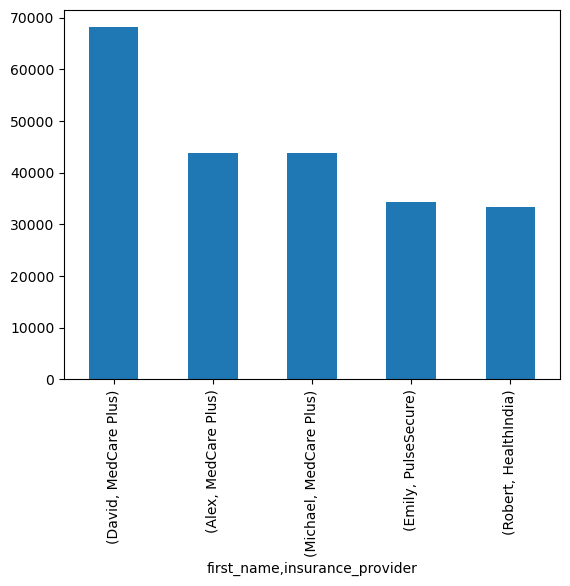

In [70]:
des.plot(kind='bar')

In [72]:
#9.  Patients with bills above mean + 2*std
total=Billing.groupby('patient_id')['amount'].sum()
total

patient_id
P001     7719.07
P002     5968.74
P003     7936.88
P004     5362.51
P005    18609.91
P007    10734.38
P008     3636.89
P009    10556.54
P010    15929.15
P011     7728.88
P012    30053.08
P013     9308.08
P014    13236.19
P016    22967.94
P017    14850.28
P018     5087.79
P019    10408.90
P020     6237.18
P021     9374.61
P022    13143.45
P023    13237.69
P024    10476.70
P025    19513.17
P026    10487.70
P027     1736.69
P028     6227.44
P029    13324.50
P030     5588.64
P031    13732.02
P032    13656.67
P033    12234.85
P034     9104.39
P035    18407.42
P036    21583.56
P037    13886.89
P038     7537.98
P039    14357.43
P040     5602.68
P041     7506.22
P042     4506.78
P043     4947.03
P044     9324.10
P045    13120.96
P046    10031.80
P047    10423.17
P048    17082.48
P049    23554.06
P050    11206.38
Name: amount, dtype: float64

In [74]:
threshold=total.mean()+2*total.std()
threshold

np.float64(23044.746518560063)

In [75]:
total[total>threshold]

patient_id
P012    30053.08
P049    23554.06
Name: amount, dtype: float64

In [79]:
#10. Doctor with max unique patients
unique_patients = (Appointments.groupby("doctor_id")["patient_id"].nunique().reset_index(name="unique_patients"))

In [80]:
unique_patients.idxmax()

doctor_id          9
unique_patients    4
dtype: int64